Реализация LLE алгоритма

Домашнее задание №4

Выполнила Чурилина Валентина

Алгорим реализован на основе статьи https://cs.nyu.edu/~roweis/lle/algorithm.html

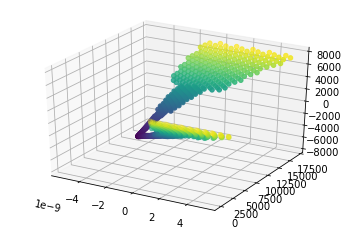

In [26]:
# Датасет

from math import pi, sin, cos
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

N = 800
tt = []
hh = []

x = []
y = []
z = []
color = []
for i in range(800):
  tt.append((3*pi/2)*(1+2*i))
  hh.append(21*i)
  x.append(tt[i]*cos(tt[i]))
  y.append(hh[i])
  z.append(tt[i]*sin(tt[i]))
  color.append(tt[i])
    
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=color)

In [27]:

# Функция поиска соседей

def neighbours(N, x_N, y_N, z_N, x_copy, y_copy, z_copy, K, neighbours_coord_x, neighbours_coord_y, neighbours_coord_z, stop, number_items, non_zero_id=list()):
  min_distance = float('inf')

  for i in range(len(x_copy)):
    distance = ((x_copy[i]-x_N)**2 + (y_copy[i]-y_N)**2 + (z_copy[i]-z_N)**2)**1/2
    if distance < min_distance:
      min_distance = distance
      neighbours_number = i

  neighbours_coord_x[number_items[neighbours_number]] = x_copy[neighbours_number] - x_N
  neighbours_coord_y[number_items[neighbours_number]] = y_copy[neighbours_number] - y_N
  neighbours_coord_z[number_items[neighbours_number]] = z_copy[neighbours_number] - z_N

  non_zero_id.append(number_items[neighbours_number])

  stop = stop + 1
  x_copy.pop(neighbours_number)
  y_copy.pop(neighbours_number)
  z_copy.pop(neighbours_number)
  number_items.pop(neighbours_number)

  if stop < K:
    neighbours(N, x_N, y_N, z_N, x_copy, y_copy, z_copy, K, neighbours_coord_x, neighbours_coord_y, neighbours_coord_z, stop, number_items, non_zero_id)

  return neighbours_coord_x, neighbours_coord_y, neighbours_coord_z, sorted(non_zero_id)

In [28]:
# Тело программы
import numpy as np
from numpy import linalg as LA

K = 6  # Задаем количество ближайших соседей (не меньше 2)

W = np.zeros((len(x), len(x))) #[[0 for i in range(len(x))] for n in range(len(x))]
ones_column = np.ones(K) # [1 for i in range(len(x))]

for i in range(len(x)):
  # Шаг 1
  # Создаем массивы заполненные нулями для записи соседей
  neighbours_coord_x = []
  neighbours_coord_y = []
  neighbours_coord_z = []
  number_items = []
  for ii in range(len(x)):
    neighbours_coord_x.append(0)
    neighbours_coord_y.append(0)
    neighbours_coord_z.append(0)
    number_items.append(ii)

  # Создаем массивы для удаление ненужных элементов
  x_copy = x.copy()
  y_copy = y.copy()
  z_copy = z.copy()
  x_copy.pop(i)
  y_copy.pop(i)
  z_copy.pop(i)
  number_items.pop(i)
  x_N = x[i]
  y_N = y[i]
  z_N = z[i]

  stop = 0

  # Вызываем функцию поиска ближайших соседей
  neighbours_coord_x, neighbours_coord_y, neighbours_coord_z, non_zero_id = neighbours(i, x_N, y_N, z_N, x_copy, y_copy, z_copy, K, 
                                                                                       neighbours_coord_x, neighbours_coord_y, neighbours_coord_z, 
                                                                                       stop, number_items, non_zero_id=list())
  # Шаг 2. Поск коэффициентов W
  Z = np.vstack([neighbours_coord_x, neighbours_coord_y, neighbours_coord_z])[:, non_zero_id]
  C = Z.T.dot(Z) + np.eye(K)*1e-3*np.trace(C)
  ans =  np.linalg.inv(C) @ ones_column #np.linalg.lstsq(C, ones_column, rcond=None)[0]
  if ans.sum() != 0 : ans = ans/ans.sum()

  W[i, non_zero_id]  = ans


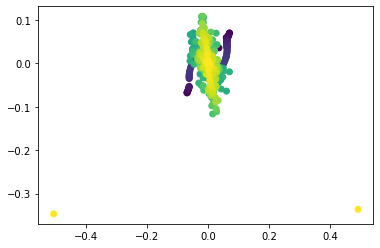

In [29]:
import matplotlib.pyplot as plt

# Шаг 3. Восстановление координат в двумерных координатах
from numpy import linalg as LA
ones_matr = np.eye(len(x))
M = (ones_matr - W).T.dot(ones_matr - W)

wa, va = LA.eigh(M)
plt.scatter(va[1], va[2], c = color)
plt.show()